## Examen Segundo Parcial

- Estudiante: Minto Arze Javier Diego
- CU: 35-5535

1. Busque su nombre en el archivo excel adjunto y aplique de acuerdo al dataset asiganado una tecnica de aprendizaje no supervisado, para lograr generar los labelsque se tenga en el dataset respectivo, se debe aplicar y explicar obligatoriamente los pasos empleados dentro del cuadernillo que se genere.
Los dos primeros numeros que se encuentran en la columna D1 y D2 son a las que debe aplicar el modelo, sin embargo si cualquiera de numeros de dataset asignados, corresponde a un dataset que usted utilizo y registro en los respectivos laboratorios, debe utilizar el D3, D4, D5 o D6 respectivamente.
Las respuestas deben ser defendidas en el horario establecido para el examen, las cuales deben ser realizadas en un cuadernillo en google collab, donde se debe considerar solamente incluir el texto que corresponda a la explicacion que propone como respuesta.

Dataset D1: https://archive.ics.uci.edu/ml/datasets/Individual+household+electric+power+consumption

Procesamos el Dataset con la librería de Pandas respetando la separación con ";" que está en el txt

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

dataset_path = r'C:\Users\diego\Documents\USFX\IA\Datasets\household_power_consumption.txt'

df = pd.read_csv(
    dataset_path,
    sep=';',                    
    na_values='?',                
)

print(df.head())



         Date      Time  Global_active_power  Global_reactive_power  Voltage  \
0  16/12/2006  17:24:00                4.216                  0.418   234.84   
1  16/12/2006  17:25:00                5.360                  0.436   233.63   
2  16/12/2006  17:26:00                5.374                  0.498   233.29   
3  16/12/2006  17:27:00                5.388                  0.502   233.74   
4  16/12/2006  17:28:00                3.666                  0.528   235.68   

   Global_intensity  Sub_metering_1  Sub_metering_2  Sub_metering_3  
0              18.4             0.0             1.0            17.0  
1              23.0             0.0             1.0            16.0  
2              23.0             0.0             2.0            17.0  
3              23.0             0.0             1.0            17.0  
4              15.8             0.0             1.0            17.0  


Observamos las columnas que tenemos las cuales son las siguientes:

In [89]:
print(df.columns)


Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


Las columnas como Date y Time son dos columnas que no son numéricas o no son válidas para nuestro algoritmo, por lo tanto vamos a escoger el resto de columnas para nuestro estudio

In [90]:
features = ['Global_active_power', 'Global_reactive_power', 'Voltage',
            'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

df_clean = df[features].dropna()
print(df_clean.head())


   Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                4.216                  0.418   234.84              18.4   
1                5.360                  0.436   233.63              23.0   
2                5.374                  0.498   233.29              23.0   
3                5.388                  0.502   233.74              23.0   
4                3.666                  0.528   235.68              15.8   

   Sub_metering_1  Sub_metering_2  Sub_metering_3  
0             0.0             1.0            17.0  
1             0.0             1.0            16.0  
2             0.0             2.0            17.0  
3             0.0             1.0            17.0  
4             0.0             1.0            17.0  


Una vez definida nuestra X vamos a normalizar todos los datos mediante la función fit_transform de StandardScaler, esta clase nos permite estandarizar nuestros datos obteniendo una media 0 y desviación estándar 1, despues imprimiremos X.shape.

In [91]:
scaler = StandardScaler()
X = scaler.fit_transform(df_clean.values)
X.shape

(2049280, 7)

Podemos observar que se tiene una cantidad de 2049280 registros, esto significa una gran capacidad de cómputo para nuestro algoritmo, ahora no sabemos cuál es el número de grupos que deberíamos tener al manejar datos no etiquetados, también es difícil establecer un número de grupos o clusters sin antes saber si esta cantidad es óptima por lo que a continuación veremos el silhouette score para distintos tipos de K-MEANS manejando un valor de clusters o K que irá en aumento, al tener una cantidad grande de registros este proceso será muy lento por lo que hemos realizado este proceso 3 veces con 35000, 15000 y 10000 registros aleatorios del dataset obteniendo lo siguiente

In [92]:
X_sample = resample(X, n_samples=35000, random_state=42)

k_values = range(2, 13)
kmeans_per_k = [KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42).fit(X_sample) for k in k_values]
silhouette_scores = [silhouette_score(X_sample, model.labels_) for model in kmeans_per_k]

for k, score in zip(k_values, silhouette_scores):
    print(f'k = {k}: Silhouette Score = {score:.4f}')


k = 2: Silhouette Score = 0.4026
k = 3: Silhouette Score = 0.4204
k = 4: Silhouette Score = 0.4396
k = 5: Silhouette Score = 0.3473
k = 6: Silhouette Score = 0.3372
k = 7: Silhouette Score = 0.3070
k = 8: Silhouette Score = 0.3028
k = 9: Silhouette Score = 0.3048
k = 10: Silhouette Score = 0.2861
k = 11: Silhouette Score = 0.3090
k = 12: Silhouette Score = 0.2897


In [93]:
X_sample = resample(X, n_samples=15000, random_state=42)

k_values = range(2, 13)
kmeans_per_k = [KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42).fit(X_sample) for k in k_values]
silhouette_scores = [silhouette_score(X_sample, model.labels_) for model in kmeans_per_k]

for k, score in zip(k_values, silhouette_scores):
    print(f'k = {k}: Silhouette Score = {score:.4f}')

k = 2: Silhouette Score = 0.4020
k = 3: Silhouette Score = 0.4201
k = 4: Silhouette Score = 0.4395
k = 5: Silhouette Score = 0.3458
k = 6: Silhouette Score = 0.3335
k = 7: Silhouette Score = 0.3082
k = 8: Silhouette Score = 0.3036
k = 9: Silhouette Score = 0.3050
k = 10: Silhouette Score = 0.2884
k = 11: Silhouette Score = 0.3001
k = 12: Silhouette Score = 0.2984


In [94]:
X_sample = resample(X, n_samples=10000, random_state=42)

k_values = range(2, 13)
kmeans_per_k = [KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42).fit(X_sample) for k in k_values]
silhouette_scores = [silhouette_score(X_sample, model.labels_) for model in kmeans_per_k]

for k, score in zip(k_values, silhouette_scores):
    print(f'k = {k}: Silhouette Score = {score:.4f}')

k = 2: Silhouette Score = 0.4026
k = 3: Silhouette Score = 0.4206
k = 4: Silhouette Score = 0.4407
k = 5: Silhouette Score = 0.3457
k = 6: Silhouette Score = 0.3340
k = 7: Silhouette Score = 0.3091
k = 8: Silhouette Score = 0.3057
k = 9: Silhouette Score = 0.3073
k = 10: Silhouette Score = 0.2947
k = 11: Silhouette Score = 0.3003
k = 12: Silhouette Score = 0.2898


En los 3 casos podemos ver que el número óptimo de grupos es k=4, esto gracias al Silhouette Score que mientras más cercano a 1 sea indica una mejor agrupación de datos en los clusters.
Procederemos a entrenar un Modelo K-MEANS con esta cantidad de Clusters definidos usando nuestra variable de X_sample para facilitar los cálculos siguientes.

In [95]:
from sklearn.cluster import KMeans

k = 4 
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X_sample)


In [96]:
kmeans.cluster_centers_

array([[-0.61585857, -0.10728941,  0.29026996, -0.60889747, -0.17501159,
        -0.14993009, -0.70839733],
       [ 0.70420825,  0.09608484, -0.38009697,  0.68732728, -0.14963011,
        -0.13654413,  1.18337926],
       [ 2.697394  ,  0.84827183, -1.02661415,  2.71295949,  5.81364789,
         0.23381449,  0.53542922],
       [ 2.48491383,  0.83420952, -0.93022711,  2.51701947, -0.08002999,
         5.75031164,  0.57622485]])

En la siguiente gráfica también observaremos la puntuación del Silhouette Score para una seríe de clusters desde una cantidad de 2 hasta 12, esta gráfica también nos confirma que el pico más alto y mejor agrupación es una cantidad de 4 Clusters.

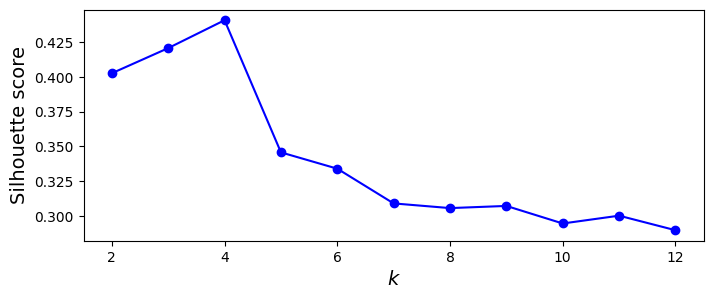

In [97]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 13), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

Ahora si no estamos muy seguros también podemos realizar nuestro conjunto de gráficas de Silhouette para los distintos valores de K, donde cada cluster está identificado por colores y se tiene una línea roja la cual indica o marca el promedio de silhouette para ese determinado grupo de K, si nuestros clusters sobrepasan esta línea significa que tenemos una buena agrupación, el objetivo de esta gráfica es confirmar el número óptimo para K observando que cada cluster sea proporcional y no esté por debajo de nuestro promedio, vemos que con K=2 se tiene un grupo mucho más grande que el otro, pero cuando vemos k=4 observamos una mejor distribución o alineación con menos cantidades negativas lo cual llegamos a determinar como el número óptimo visualmente.


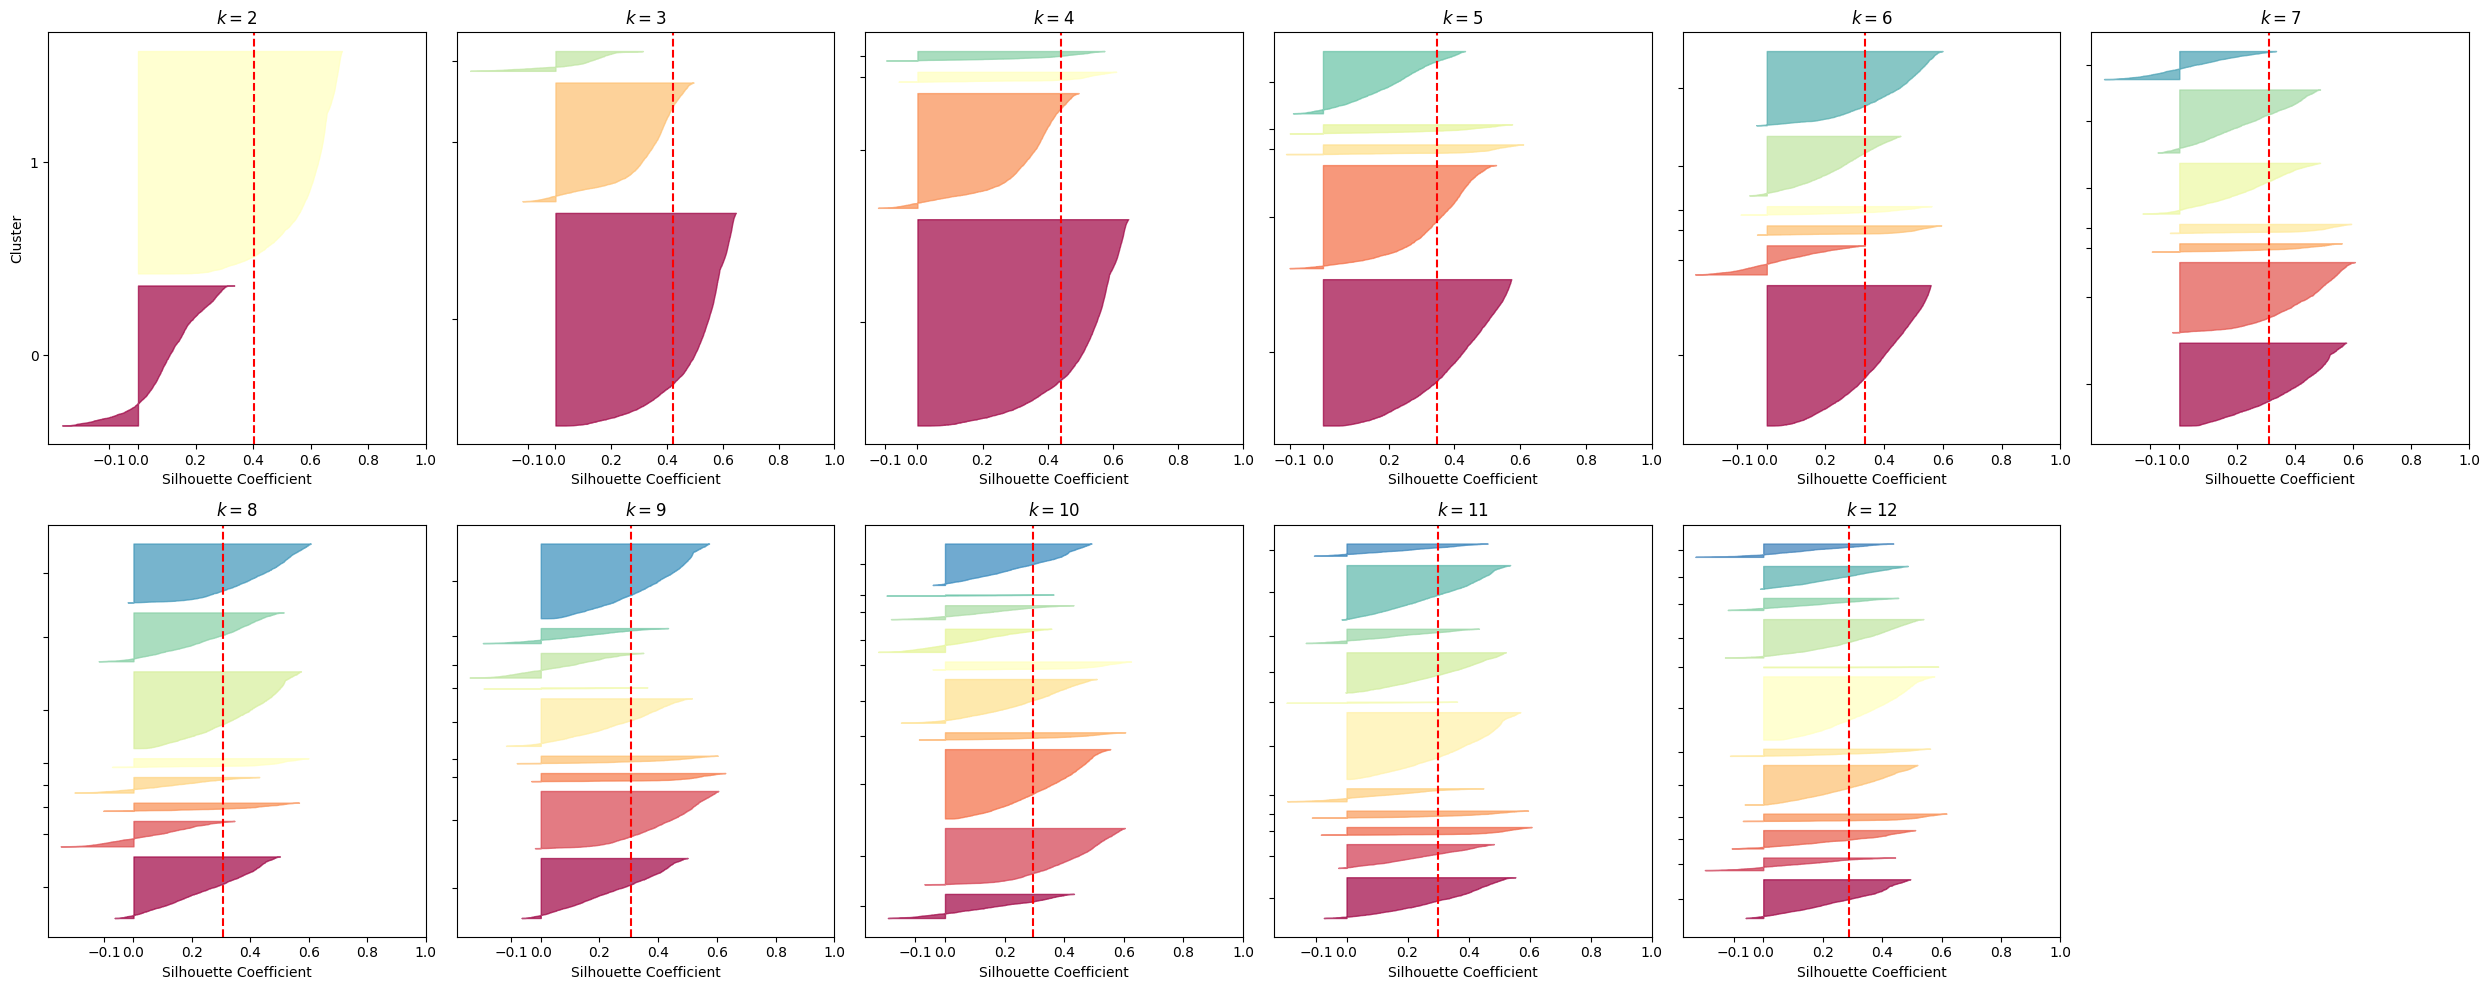

In [98]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import numpy as np


plt.figure(figsize=(25, 10))

for idx, k in enumerate(range(2, 13), 1):
    plt.subplot(2, 6, idx) 

    y_pred = kmeans_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(X_sample, y_pred)

    padding = len(X_sample) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if idx == 1:
        plt.ylabel("Cluster")
    else:
        plt.tick_params(labelleft=False)

    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=12)

plt.tight_layout()
plt.show()


Por último comprobaremos esta cantidad de K mediante el método del codo donde a lo largo del eje X que son los valores de K veremos como baja nuestro WCSS que es la suma de errores dentro de los clusters y a su vez indican qué tanta es la dispersión de los puntos dentro de cada cluster con respecto a los centroides.

In [99]:
wcss = []
for k in range(2, 20):
  kmeans_codo = KMeans(n_clusters=k, random_state=42)
  kmeans_codo.fit(X_sample)
  wcss.append(kmeans_codo.inertia_)

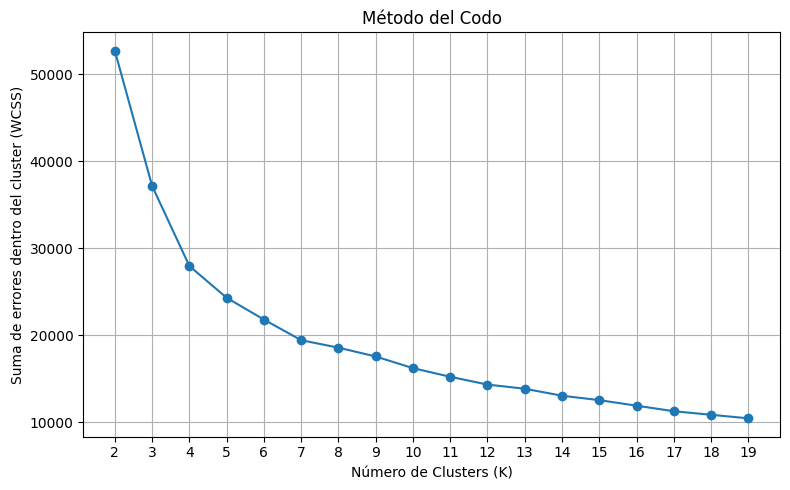

In [100]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Suma de errores dentro del cluster (WCSS)')
plt.xticks(range(2, 20))
plt.grid(True)
plt.tight_layout()
plt.show()

Podemos observar un descenso de WCSS a medida que avanzan los clusters llegando a encontrar el codo en K=4, identificamos este punto ya que a partir de 4 la pendiente empieza a ser más suave y no se lgora un cambio o significativo, este resultado coincide con los puntos vistos anteriormente y podemos indicar que para este Dataset el número óptimo de grupos es de 4

Dataset D2: https://www.kaggle.com/datasets/subhajournal/wine-quality-data-combined

A continuación aplicaremos todo lo visto anteriormente al segundo Dataset

In [101]:
import numpy as np
import pandas as pd

dataset_path = r'C:\Users\diego\Documents\USFX\IA\Datasets\WineQuality.csv'
df = pd.read_csv(dataset_path)

clean_df = df.drop(columns=['Unnamed: 0', 'Type', 'quality'])

print("Dataset de entrenamiento (primeras filas):\n{}".format(
    pd.DataFrame(clean_df.values, columns=clean_df.columns).head().to_string(index=False)))


Dataset de entrenamiento (primeras filas):
 fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density   pH  sulphates  alcohol
           7.4             0.170         0.29             1.4      0.047                 23.0                 107.0  0.99390 3.52       0.65     10.4
           5.3             0.310         0.38            10.5      0.031                 53.0                 140.0  0.99321 3.34       0.46     11.7
           4.7             0.145         0.29             1.0      0.042                 35.0                  90.0  0.99080 3.76       0.49     11.3
           6.9             0.260         0.29             4.2      0.043                 33.0                 114.0  0.99020 3.16       0.31     12.5
           6.4             0.450         0.07             1.1      0.030                 10.0                 131.0  0.99050 2.97       0.28     10.8


Soltamos las columnas:
- Unnamed: Es una especie de identificador para cada registro el cual es irrelevante para nuestro estudio.
- Type: Esta es una columna que indica el tipo de vino en texto lo cual no es posible de manejar por parte de nuestro algoritmo.
- Quality: Esta columna es una clasificación del 1 al 10 que mide la calidad del Vino, al ser esta una clasificación vamos a soltarla para tener listo un conjunto de datos que no poseen ninguna etiqueta.

Aplicamos el mismo proceso de normalización que vimos en el anterior dataset

In [102]:
scaler = StandardScaler()
X_Wines = scaler.fit_transform(clean_df)
X_Wines.shape

(32485, 11)

Al no tener una cantidad tan grande de registros usaremos la totalidad de nuestros datos para llegar a identificar el valor o cantidad óptima de grupos.

In [103]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans_per_k = [KMeans(n_clusters=k, init='k-means++', random_state=42).fit(X_Wines) for k in range(2, 13)]

silhouette_scores = [silhouette_score(X_Wines, model.labels_) for model in kmeans_per_k[1:]]

for k, score in zip(k_values, silhouette_scores):
    print(f'k = {k}: Silhouette Score = {score:.4f}')

k = 2: Silhouette Score = 0.2360
k = 3: Silhouette Score = 0.2485
k = 4: Silhouette Score = 0.1841
k = 5: Silhouette Score = 0.1806
k = 6: Silhouette Score = 0.1675
k = 7: Silhouette Score = 0.1609
k = 8: Silhouette Score = 0.1490
k = 9: Silhouette Score = 0.1438
k = 10: Silhouette Score = 0.1401
k = 11: Silhouette Score = 0.1268


Vemos que el mayor Silhouette Score pertenece a k=3 por lo tanto usaremos esta cantidad de clusters para el algoritmo de KMeans

In [104]:
from sklearn.cluster import KMeans

k = 3 
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X_Wines)

In [105]:
kmeans.cluster_centers_

array([[ 0.87899026,  1.19776722, -0.32803086, -0.60391323,  0.95484684,
        -0.83835325, -1.20607764,  0.70533857,  0.52583124,  0.84325296,
        -0.127757  ],
       [-0.35130028, -0.40786846, -0.0071255 , -0.43628034, -0.44356575,
        -0.08914629,  0.0414914 , -0.84724805, -0.03798125, -0.2804025 ,
         0.55905093],
       [-0.18319602, -0.36344886,  0.29046363,  1.21466569, -0.09947039,
         0.85631766,  0.95919294,  0.76137058, -0.38623247, -0.26671361,
        -0.78958684]])

Cabe aclarar que aquí vemos la posición de cada cluster o centroide dentro de las dimensiones de nuestro dataset y como podemos observar existen 3 Clusters.

A continuación haremos el mismo estudio que hicimos con el dataset anterior para encontrar la cantidad óptima de grupos basándonos en gráficas que apoyen nuestras ideas.
Nuevamente vemos un pico alto de Silhouette Score en la cantidad de K=3 y un gran descenso para los siguientes.

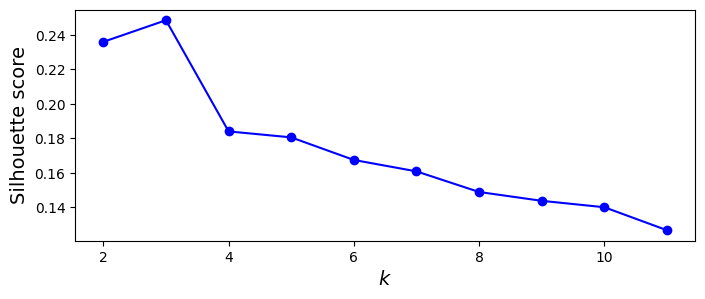

In [106]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 12), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

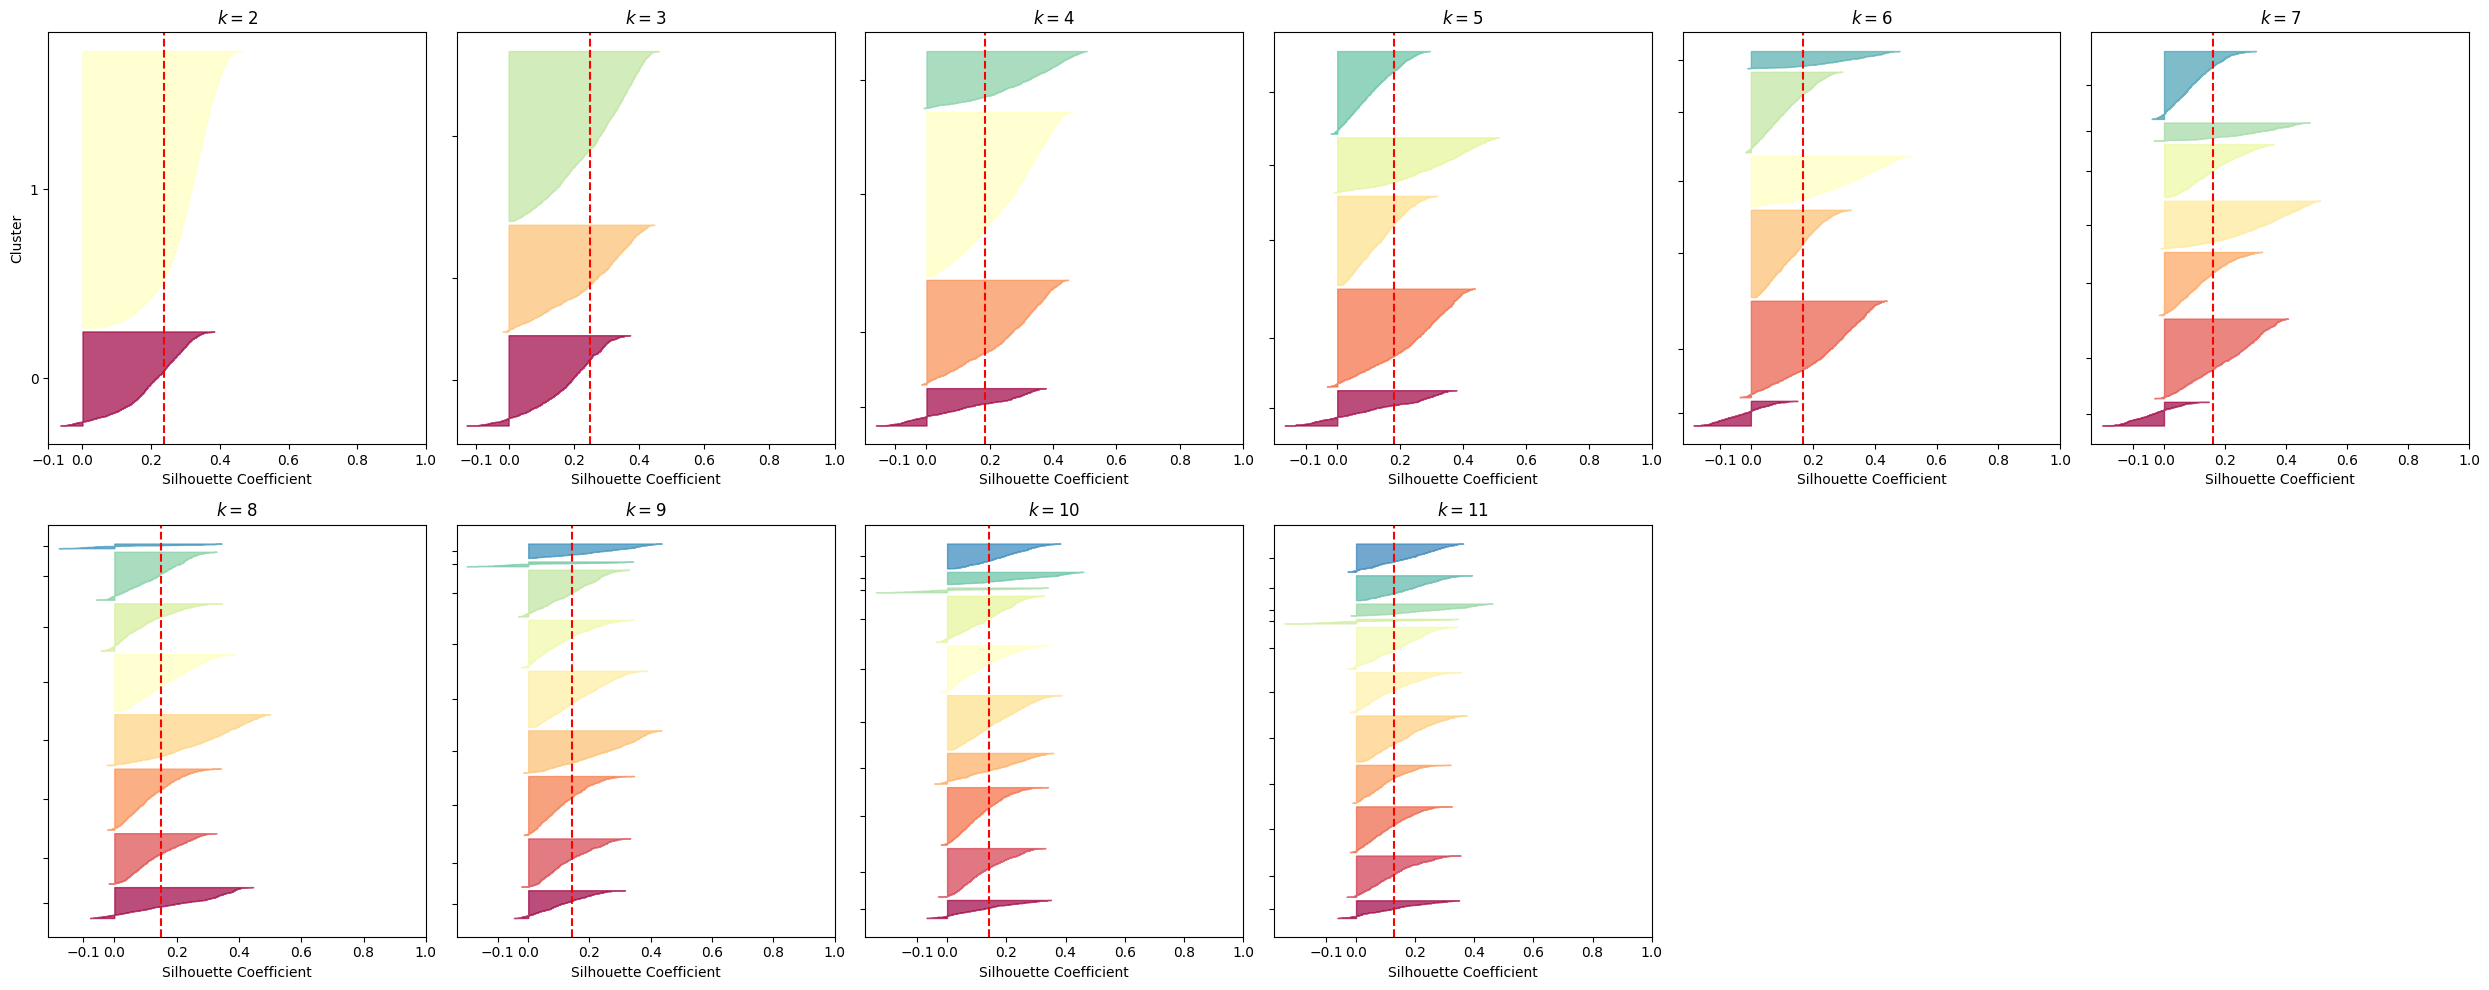

In [107]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
import numpy as np


plt.figure(figsize=(25, 10))

for idx, k in enumerate(range(2, 12), 1):
    plt.subplot(2, 6, idx) 

    y_pred = kmeans_per_k[k - 2].labels_
    silhouette_coefficients = silhouette_samples(X_Wines, y_pred)

    padding = len(X_sample) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))

    if idx == 1:
        plt.ylabel("Cluster")
    else:
        plt.tick_params(labelleft=False)

    plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.xlabel("Silhouette Coefficient")

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title(f"$k={k}$", fontsize=12)

plt.tight_layout()
plt.show()


Observamos que las distribuciones en k=3 son las mejores y más proporcionales a diferencia del resto que si bien algunas lucen mejor suelen tener una cantidad negativa de datos, grupos mucho más pequeños que el resto o grupos que no sobrepasan la línea de promedio lo cual es una señal de un mal agrupamiento.

In [ ]:
wcss = []
for k in range(2, 20):
  kmeans_codo = KMeans(n_clusters=k, random_state=42)
  kmeans_codo.fit(X_Wines)
  wcss.append(kmeans_codo.inertia_)

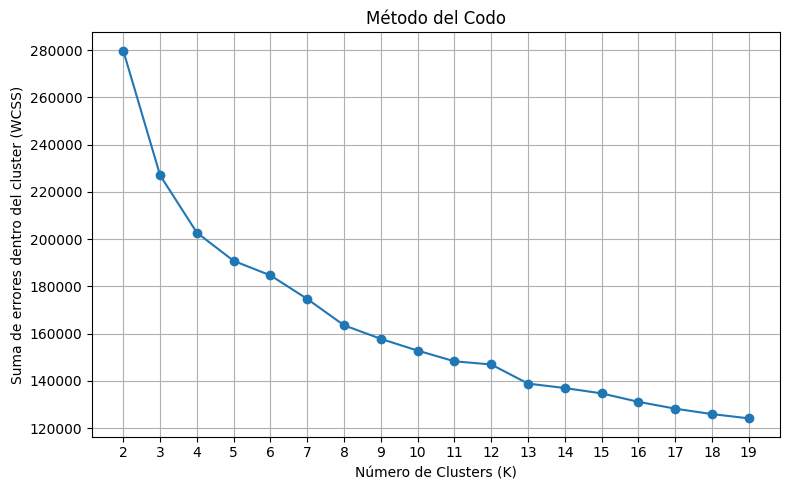

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Suma de errores dentro del cluster (WCSS)')
plt.xticks(range(2, 20))
plt.grid(True)
plt.tight_layout()
plt.show()

Por último nuevamente vemos un descenso rápido en el método del codo hasta la cantidad ed k=3 donde a partir de este no se encuentran grandes cambios significativos así que podemos determinar que k=3 es el codo y por lo tanto la cantidad adecuada de clusters para este Dataset.

2. Desarrolle un cuadernillo aplicando aprendizaje por refuerzo, para que un agente pueda jugar cuatro en raya.

In [1]:
import numpy as np

class Board:
    def __init__(self):
        self.rows = 6
        self.cols = 7
        self.state = np.zeros((self.rows, self.cols))

    def reset(self):
        self.state = np.zeros((self.rows, self.cols))

    def valid_moves(self):
        return [c for c in range(self.cols) if self.state[0, c] == 0]

    def update(self, symbol, col):
        for row in range(self.rows - 1, -1, -1):
            if self.state[row, col] == 0:
                self.state[row, col] = symbol
                return row, col
        raise ValueError("movimiento ilegal !")

    def is_game_over(self):
        def check_direction(start_row, start_col, d_row, d_col):
            for i in range(self.rows):
                for j in range(self.cols):
                    try:
                        vals = [self.state[i + k * d_row, j + k * d_col] for k in range(4)]
                        s = sum(vals)
                        if s == 4:
                            return 1
                        elif s == -4:
                            return -1
                    except IndexError:
                        continue
            return None

        for d_row, d_col in [(0,1), (1,0), (1,1), (1,-1)]:
            result = check_direction(0, 0, d_row, d_col)
            if result is not None:
                return result

        if len(self.valid_moves()) == 0:
            return 0

        return None


In [2]:
class Game:
    def __init__(self, player1, player2):
        player1.symbol = 1
        player2.symbol = -1
        self.players = [player1, player2]
        self.board = Board()

    def selfplay(self, rounds=500):
        wins = [0, 0]
        for _ in range(rounds):
            self.board.reset()
            for p in self.players:
                p.reset()

            game_over = False
            while not game_over:
                for player in self.players:
                    move_col = player.move(self.board)
                    row, col = self.board.update(player.symbol, move_col)
                    for p in self.players:
                        p.update(self.board)
                    result = self.board.is_game_over()
                    if result is not None:
                        game_over = True
                        break
            self.reward()

            winner = self.board.is_game_over()
            if winner == self.players[0].symbol:
                wins[0] += 1
            elif winner == self.players[1].symbol:
                wins[1] += 1
        return wins

    def reward(self):
        result = self.board.is_game_over()
        if result == 0: 
            for p in self.players:
                p.reward(0.5)
        else:
            for p in self.players:
                if p.symbol == result:
                    p.reward(1)
                else:
                    p.reward(0)


In [3]:
class Agent():
    def __init__(self, alpha=0.1, prob_exp=0.3):
        self.value_function = {}
        self.alpha = alpha
        self.positions = []
        self.prob_exp = prob_exp

    def reset(self):
        self.positions = []

    def move(self, board, explore=True):
        valid_moves = board.valid_moves()

        if explore and np.random.uniform(0, 1) < self.prob_exp:
            return np.random.choice(valid_moves)

        max_value = -np.inf
        best_move = valid_moves[0]

        for col in valid_moves:
            temp_state = board.state.copy()
            row = next(r for r in range(board.rows - 1, -1, -1) if temp_state[r, col] == 0)
            temp_state[row, col] = self.symbol
            key = str(temp_state.reshape(-1))
            value = self.value_function.get(key, 0)
            if value > max_value:
                max_value = value
                best_move = col

        return best_move

    def update(self, board):
        self.positions.append(str(board.state.reshape(-1)))

    def reward(self, final_reward):
        for pos in reversed(self.positions):
            if pos not in self.value_function:
                self.value_function[pos] = 0
            self.value_function[pos] += self.alpha * (final_reward - self.value_function[pos])
            final_reward = self.value_function[pos]


In [5]:
agent1 = Agent(prob_exp=0.3)
agent2 = Agent()

game = Game(agent1, agent2)

resultados = game.selfplay(3000)
print("Victorias de Agente1 vs Agente2: ", resultados)


Victorias de Agente1 vs Agente2:  [1436, 1549]


In [7]:
import pandas as pd

funcion_de_valor = sorted(agent1.value_function.items(), key=lambda kv: kv[1], reverse=True)
tabla = pd.DataFrame({'estado': [x[0] for x in funcion_de_valor], 'valor': [x[1] for x in funcion_de_valor]})

tabla

,estado,valor
0,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.928210
1,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.849905
2,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.794109
3,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.794109
4,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.745813
...,...,...
36222,[ 1. 0. 0. 0. 0. 0. 0. -1. 0. 0. 0. ...,0.000000
36223,[ 1. 0. 0. 0. 0. 0. 0. -1. 0. 0. 0. ...,0.000000
36224,[ 0. 0. 0. 0. 0. 0. 0. -1. 0. 0. 0. ...,0.000000
36225,[ 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. ...,0.000000


In [8]:
import pickle

with open("agente_4enraya.pickle", "wb") as f:
    pickle.dump(agent1.value_function, f)
